In [30]:
from langgraph.graph import StateGraph, START, END 
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [56]:
class BatsmanState(TypedDict):
    runs: int 
    balls: int 
    fours: int 
    sixes: int

    strick_rate: float 
    ball_per_boundary: float    
    boundary_percent: float

    summary: str

In [66]:
def calculate_strick_rate(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls']) * 100
    
    return {'strick_rate': sr}

In [67]:
def calculate_balls_per_boundary(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / (state['fours'] + state['sixes'])

    return {'ball_per_boundary': bpb}

In [68]:
def calculate_boundary_percent(state: BatsmanState) -> BatsmanState:
    boundary_percent = (((state['fours'] + 4 + state['sixes'] * 6)) / state['runs']) * 100 

    return {'boundary_percent': boundary_percent}

In [69]:
def summary(state: BatsmanState) -> BatsmanState:
    summary = f""""
    Strike Rate - {state['strick_rate']} \n 
    Balls per boundary - {state['ball_per_boundary']} \n 
    Boundary Percent - {state['boundary_percent']}
    """

    return {'summary': summary}

In [70]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_strick_rate', calculate_strick_rate)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent) 
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_strick_rate')
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percent') 

graph.add_edge('calculate_strick_rate', 'summary')
graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END) 

workflow = graph.compile()

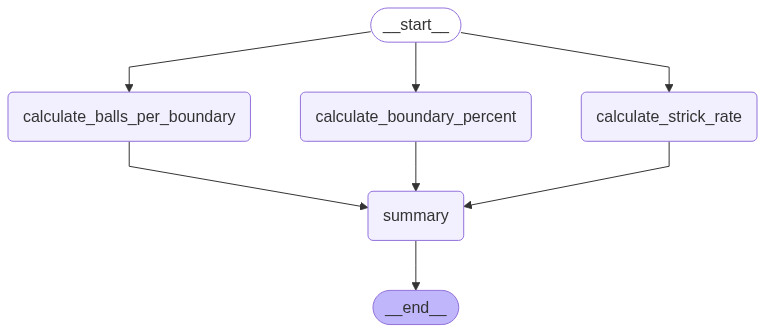

In [71]:
workflow

In [72]:
initial_state = {
    'runs': 100, 
    'balls': 50, 
    'fours': 6, 
    'sixes': 4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'strick_rate': 200.0,
 'ball_per_boundary': 5.0,
 'boundary_percent': 34.0,
 'summary': '"\n    Strike Rate - 200.0 \n \n    Balls per boundary - 5.0 \n \n    Boundary Percent - 34.0\n    '}